In [1]:
import sys
from __future__ import division

In [2]:
import numpy as np
from phasor.utilities.ipynb.displays import *
from phasor.utilities.ipynb.sympy import *

import declarative

from declarative.bunch import (
    DeepBunch
)

import phasor.math.dispatched as dmath 
#import phasor.math.dispatch_sympy

Populating the interactive namespace from numpy and matplotlib
Sympy version:  1.0


In [3]:
import phasor.utilities.version as version
print(version.foundations_version())

from phasor.utilities.np import logspaced

from phasor import optics
from phasor import base 
from phasor import signals 
from phasor import system
from phasor import readouts 

from phasor.signals.pade_fit.pade_fit import ratsvd

import scipy.signal

b'2017-09-29 14:18:38 -0400 (bbb2b427cdfd3d3fc1a626fa4fa5404882cc9820)'


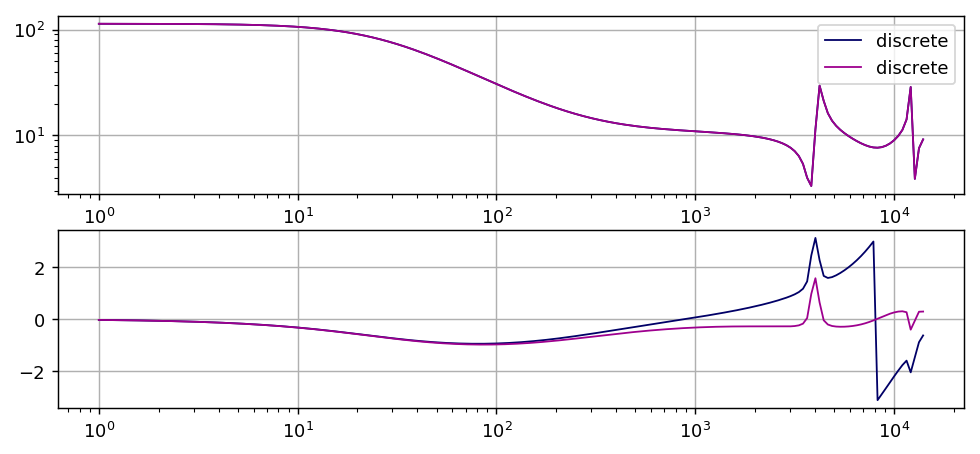

In [112]:
F_nyquist = 16384 / 2
F_AC = F_nyquist * 2 * np.arange(0, 301) / 301
    
F_AC = logspaced(1, 14000, 200)
ZPKz = (
    [
        .9,
        -.3,
        .1+.95j,
        .1-.95j,
    ], 
    [
        #.9,
        .99,
        #.97,
        -0.03+.95j,
        -.03-.95j,
        #-.2,
    ], 
    10
)


b,a = scipy.signal.zpk2tf(*ZPKz)


Fb = mplfigB(Nrows=2)
w, h = scipy.signal.freqz_zpk(*ZPKz , worN = F_AC / F_nyquist * np.pi)
F_exact = h
Fb.ax0.loglog(F_AC, abs(h), label = 'discrete')
Fb.ax1.semilogx(F_AC, np.angle(h), label = 'discrete')

w, h = scipy.signal.freqz(b, a , worN = F_AC / F_nyquist * np.pi)
F_exact = h
Fb.ax0.loglog(F_AC, abs(h), label = 'discrete')
Fb.ax1.semilogx(F_AC, np.angle(h), label = 'discrete')

Fb.ax0.legend()

In [113]:
b

array([ 10.     ,  -8.     ,   7.625  ,  -4.935  ,  -2.46375])

In [117]:
R = np.random.randn(len(F_AC)) + 1j*np.random.randn(len(F_AC))
F_noise = F_exact * (1 + R / 10)

In [118]:
fits = ratsvd(F_AC, F_noise, W = 10, order_a = 10, order_b = 10, F_nyquist=F_nyquist)
fits

14.9476413069 [ 0.98856174 -3.52014589e-17j]
242.129188146 [ 0.99148745-0.03930812j  0.99148745+0.03930812j]
5.6858374558 [-0.04183209 -9.80479646e-01j  0.98696202 +2.01227923e-16j
 -0.04183209 +9.80479646e-01j]
2.7036735153 [-0.04589920 +9.51863222e-01j -0.04589920 -9.51863222e-01j
  0.99130925 -3.20779197e-18j  0.36517758 -9.87923130e-16j]
3.22997650116 [-0.04889559 -9.45508748e-01j -0.04889559 +9.45508748e-01j
  0.98735710 +4.80065751e-16j  0.58234967 -2.96263889e-01j
  0.58234967 +2.96263889e-01j]
4.38994594297 [ 0.07074433 +9.08557917e-01j -0.06663532 +8.51244728e-01j
  0.99256097 -3.41710129e-17j  0.76753661 -4.61848906e-15j
  0.07074433 -9.08557917e-01j -0.06663532 -8.51244728e-01j]
3.19285651181 [-0.40934075 -7.92670467e-01j -0.03213644 -9.76296768e-01j
 -0.40934075 +7.92670467e-01j -0.03213644 +9.76296768e-01j
  0.74870012 -2.68077580e-01j  0.98770220 -2.66495198e-15j
  0.74870012 +2.68077580e-01j]
3.56625930836 [-0.62132526 +7.09099102e-01j -0.04564479 +9.61773467e-01j
 -0.62

[(2.7036735153006917,
  array([ 4.12812264 +3.56744493e-15j, -4.74323805 -1.11261855e-15j,
          4.54254695 -1.28209266e-15j, -3.56298228 +2.33371889e-15j,
          0.18216174 -2.00388933e-15j]),
  array([ 0.42808681 +0.00000000e+00j, -0.54139644 +2.91634668e-16j,
          0.49042949 -2.23190785e-16j, -0.51313165 +3.30624597e-16j,
          0.14073524 -3.80695810e-16j]),
  5,
  5,
  'type1'),
 (3.1928565118077934,
  array([-2.22699848 -3.50445133e-15j,  3.36363127 +1.78603232e-14j,
         -3.72421808 -7.07473332e-15j,  4.62785407 +9.67648006e-15j,
         -3.44115825 -3.76783790e-15j,  2.52957725 -4.82944990e-15j,
         -2.00505448 -3.83535637e-15j,  0.66961540 -1.13089941e-15j]),
  array([-0.22890468 +0.00000000e+00j,  0.36673919 +1.28980459e-15j,
         -0.39368500 -3.44894349e-16j,  0.55118312 +1.68441701e-16j,
         -0.44537603 -2.86070622e-16j,  0.28748140 -8.88990418e-16j,
         -0.24802876 +8.13105393e-17j,  0.10858494 +3.15678875e-18j]),
  8,
  8,
  'type1')

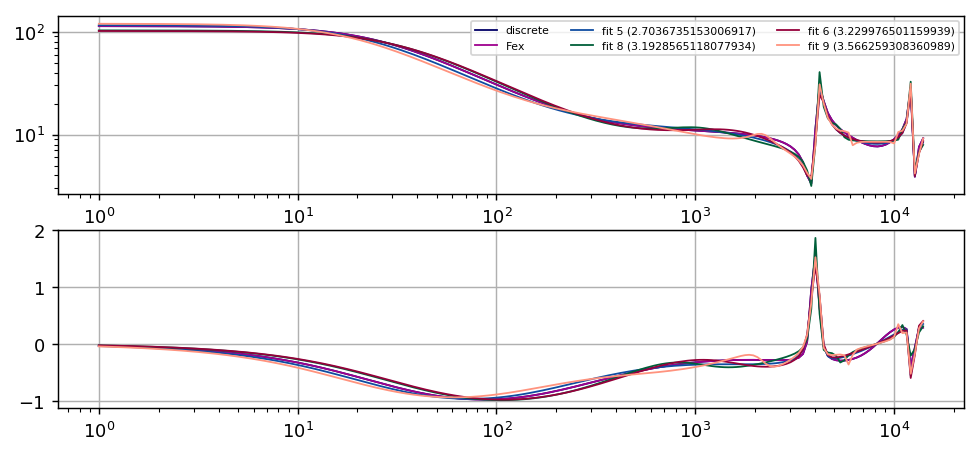

In [119]:
Fb = mplfigB(Nrows=2)
w, h = scipy.signal.freqz(b, a, worN = F_AC / F_nyquist * np.pi)
Fb.ax0.loglog(F_AC, abs(h), label = 'discrete')
Fb.ax1.semilogx(F_AC, np.angle(h), label = 'discrete')

h = F_exact
Fb.ax0.loglog(F_AC, abs(h), label = 'Fex')
Fb.ax1.semilogx(F_AC, np.angle(h), label = 'Fex')

for ftup in fits[:4]:
    res, b_fit, a_fit, order_b, order_a, type = ftup
    w, h = scipy.signal.freqz(b_fit, a_fit, worN = F_AC / F_nyquist * np.pi)
    Fb.ax0.loglog(
        F_AC, 
        abs(h), 
        label = 'fit {order_b} ({res})'.format(
            order_a = order_a, 
            order_b = order_b,
            res = res,
        ),
        #color = 'green',
    )
    Fb.ax1.semilogx(F_AC, np.angle(h), label = 'fit')

Fb.ax0.legend(ncol = 3, fontsize = 6)